# Visualizing sector allocations of a mutual fund through time

In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(plutoR)
library(quantmod)
library(PerformanceAnalytics)

options("scipen"=999)
options(stringsAsFactors = FALSE)
options(repr.plot.width=16, repr.plot.height=8)

source("config.R")
source("goofy/plot.common.R")
source("goofy/misc.common.R")

mfi <- MutualFundsIndia()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend

Registering fonts with R

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package

In [2]:
#Franklin India Prima Fund-Growth (https://github.com/stockviz/plutons/blob/master/mutual-fund-drawdown.R.ipynb)
scode <- 100473 
sname <- "Franklin India Prima Fund"

sectorAlloc <- mfi$Portfolio() %>%
    filter(SCHEME_CODE == scode 
           & INSTRUMENT == 'EQUITY' 
           & !is.null(WEIGHTAGE)
           & (INSTRUMENT_TYPE == 'STOCK' | INSTRUMENT_TYPE == 'E' | INSTRUMENT_TYPE == '' | is.null(INSTRUMENT_TYPE))) %>%
    group_by(PORTFOLIO_DATE, SECTOR) %>%
    summarize(ALLOC = sum(WEIGHTAGE)) %>%
    arrange(PORTFOLIO_DATE, SECTOR) %>%
    collect()

saDf <- sectorAlloc %>%
    mutate(SECTOR = replace(SECTOR, SECTOR == '-' | is.na(SECTOR), 'UNK')) %>%
    as.data.frame()

Warning message:
“Missing values are always removed in SQL.
Use `SUM(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”

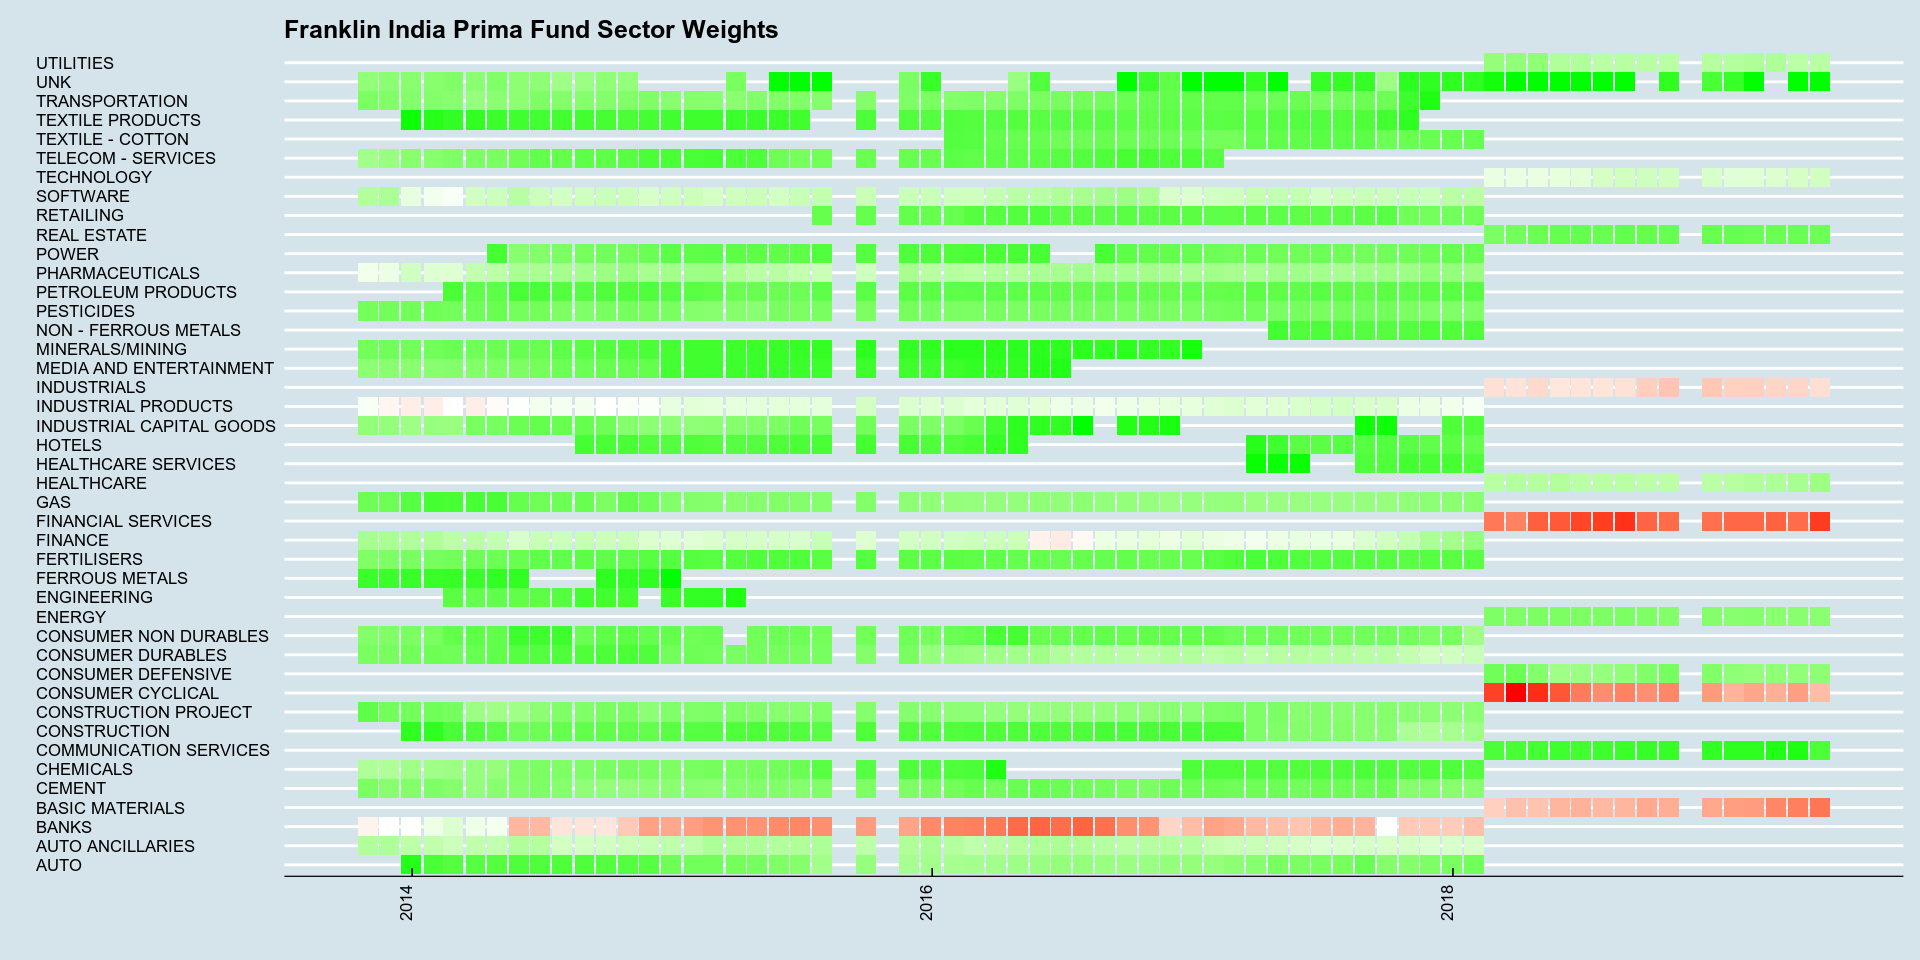

In [3]:
ggplot(saDf, aes(x = PORTFOLIO_DATE, y = SECTOR, fill = ALLOC)) +
    theme_economist() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    geom_tile() +
    #geom_text(aes(label= sprintf("%.2f", ALLOC)), hjust = 1) +
    scale_fill_gradientn(colors=c("green", "white", "red")) +
    guides(fill=F) +
    labs(x = "", y="", fill="", color="", title=sprintf("%s Sector Weights", sname)) 

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)